<a href="https://colab.research.google.com/github/gsfreitas/data-science/blob/main/BreastCancer_FeatureSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

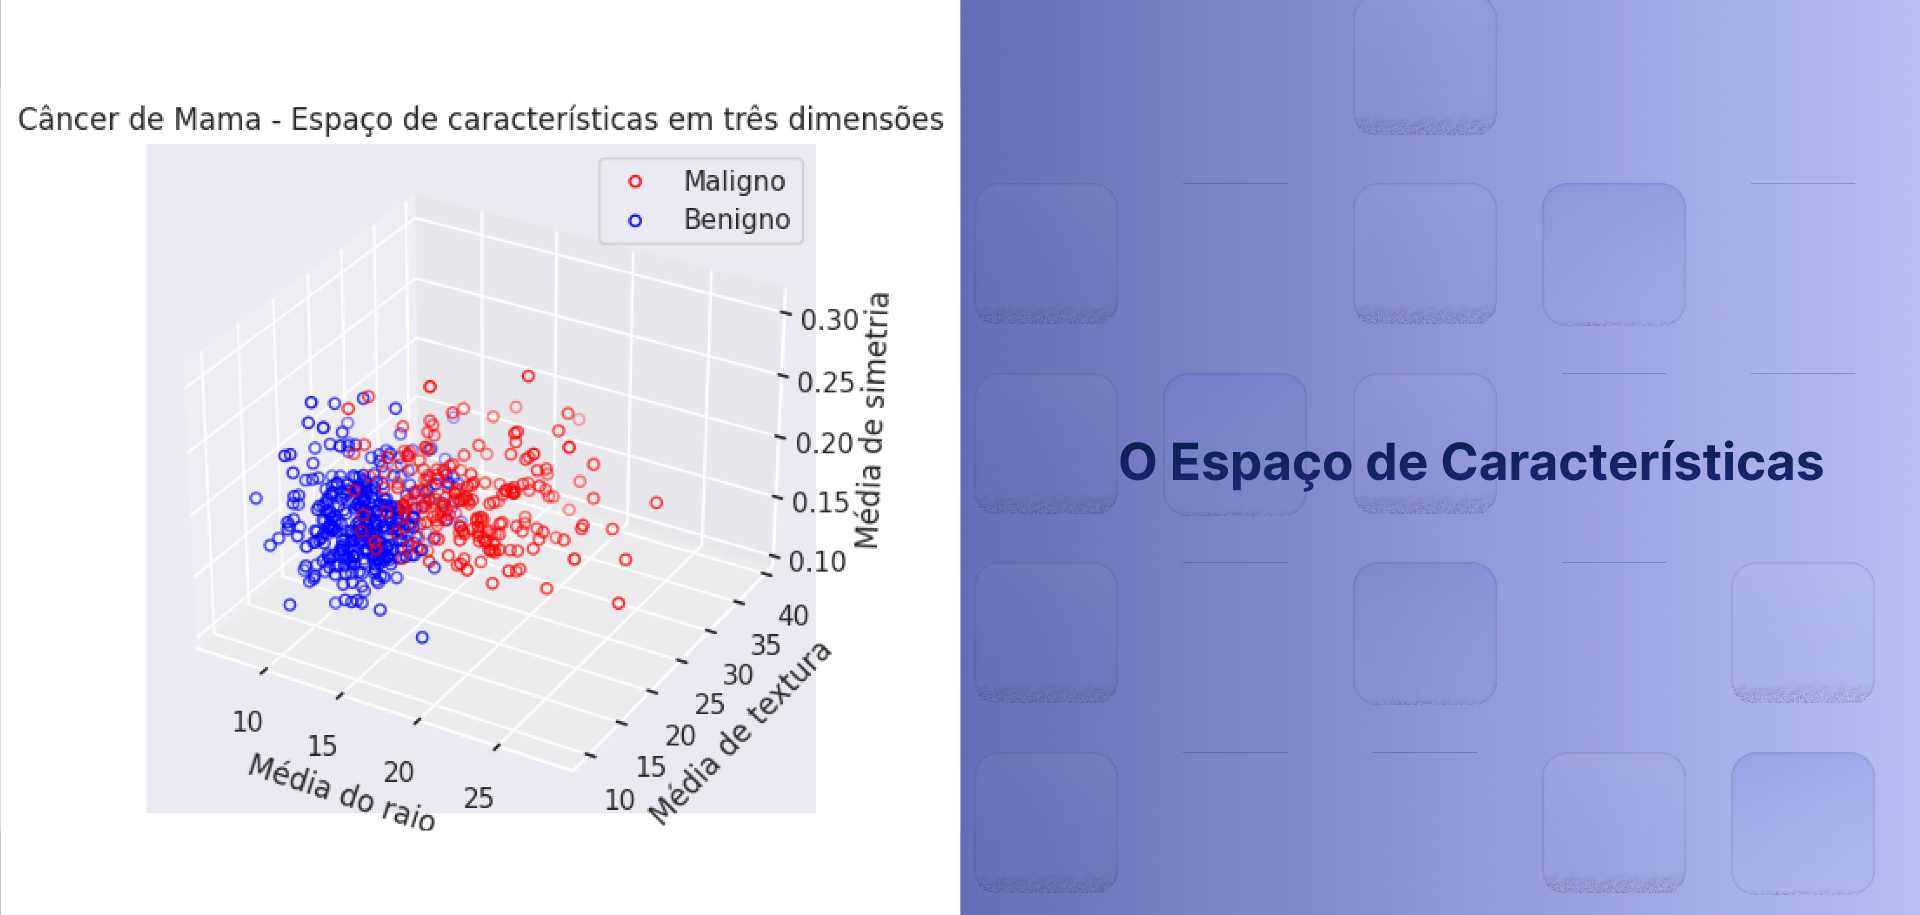

# Contexto
O câncer de mama é o tumor maligno mais comum entre as mulheres, representando 25% de todos os cânceres femininos. No Brasil, são estimados 66.280 novos casos em 2023.

A taxa de mortalidade por câncer de mama vem diminuindo nos últimos anos, mas ainda é a principal causa de morte por câncer em mulheres brasileiras.

O diagnóstico precoce é fundamental para o aumento das chances de cura. O exame de mamografia é o método mais eficaz para detectar o câncer de mama em estágio inicial, quando as chances de cura são maiores que 90%.

# Dataset
Informações do conjunto de dados:
As características são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina (PAAF) de uma massa mamária. Eles descrevem as características dos núcleos das células.

Informações do atributo:
* Número do ID
* Diagnóstico (M = maligno, B = benigno)


Dez características de valor real são calculadas para cada núcleo celular (3–32):
* a) raio (média das distâncias do centro aos pontos do perímetro)
* b) textura (desvio padrão dos valores da escala de cinza)
* c) perímetro
* d) área
* e) suavidade (variação local nos comprimentos dos raios)
* f) compacidade (perímetro² / área — 1,0)
* g) concavidade (gravidade das porções côncavas do contorno)
* h) pontos côncavos (número de porções côncavas do contorno)
* e) simetria
* j) dimensão fractal (“aproximação da linha costeira” — 1)

**Classes:**

Benigno: 2 | Maligno: 4

# Leitura e tratamento dos dados

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# leitura dos dados
df = pd.read_csv('/content/drive/MyDrive/data-science-project/feature-space-breast-cancer/data.csv',sep=',')

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# separando as classes
maligno = df[df['diagnosis']==1]
benigno = df[df['diagnosis']==0]

# Construção do espaçode características
Vamos agora construir um espaço de características em duas e e três dimensões.

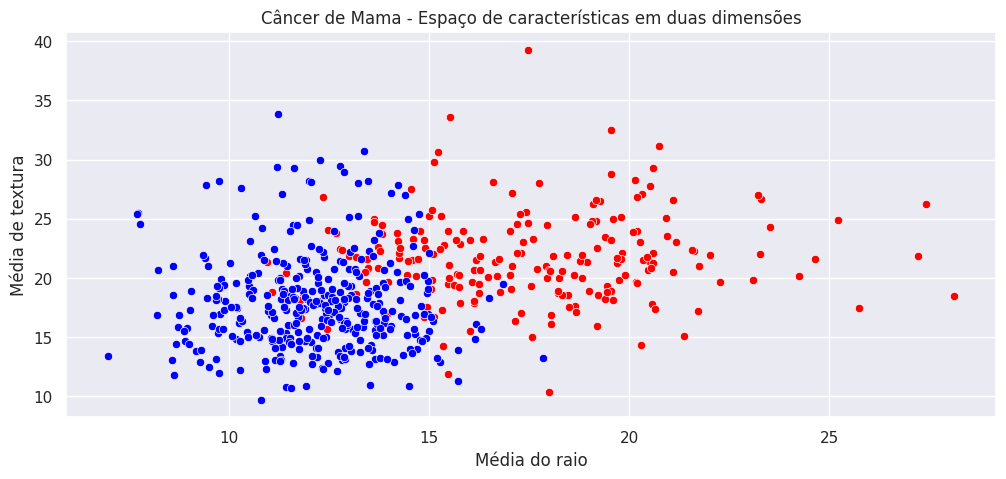

In [ ]:
# selecionando duas características
sns.set_theme()

plt.figure(figsize=(12,5))
plt.xlabel('Média do raio')
plt.ylabel('Média de textura')

sns.scatterplot(y=maligno['texture_mean'], x=maligno['radius_mean'], color='red', markers='O')
sns.scatterplot(y=benigno['texture_mean'], x=benigno['radius_mean'], color='blue', markers='O')

# definindo o título da figura
plt.title('Câncer de Mama - Espaço de características em duas dimensões')

plt.show()

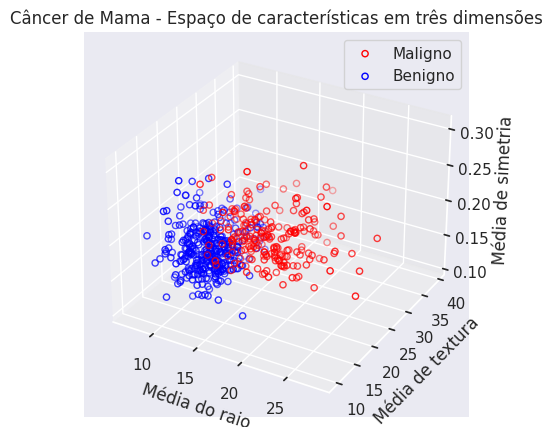

In [ ]:
# selecionando três características
sns.set_theme()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Média do raio')
ax.set_ylabel('Média de textura')
ax.set_zlabel('Média de simetria')

# Criando o scatterplot para dados malignos
ax.scatter(maligno['radius_mean'], maligno['texture_mean'], maligno['symmetry_mean'],
           color='red', marker='o', label='Maligno', facecolor='none')

# Criando o scatterplot para dados benignos
ax.scatter(benigno['radius_mean'], benigno['texture_mean'], benigno['symmetry_mean'],
           color='blue', marker='o', label='Benigno', facecolor='none')

# adicionando uma legenda
plt.legend()

# definindo o título da figura
plt.title('Câncer de Mama - Espaço de características em três dimensões')

plt.show()